In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import contractions
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re

In [2]:
df = pd.read_csv('news-data.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
categories = set(df.category)
print('Categories: {}'.format(categories))
print('No. of Categories: {}'.format(len(categories)))

Categories: {'business', 'sport', 'politics', 'tech', 'entertainment'}
No. of Categories: 5


In [4]:
df.shape

(2225, 2)

In [5]:
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [6]:
cat_map = {'sport':0, 'entertainment':1, 'business':2, 'politics':3, 'tech':4}

###  Word Count

In [7]:
df['word_counts'] = df.text.apply(lambda x: len(str(x).split()))

In [8]:
df.head()

,category,text,word_counts
0,tech,tv future in the hands of viewers with home th...,737
1,business,worldcom boss left books alone former worldc...,300
2,sport,tigers wary of farrell gamble leicester say ...,246
3,sport,yeading face newcastle in fa cup premiership s...,341
4,entertainment,ocean s twelve raids box office ocean s twelve...,260


### Character count

In [9]:
df['char_counts'] = df.text.apply(lambda x: len(x))
df.head()

,category,text,word_counts,char_counts
0,tech,tv future in the hands of viewers with home th...,737,4333
1,business,worldcom boss left books alone former worldc...,300,1842
2,sport,tigers wary of farrell gamble leicester say ...,246,1342
3,sport,yeading face newcastle in fa cup premiership s...,341,2176
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,1579


### Average word length

In [10]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
#     print(word_len)
    return word_len/len(words) # = len(X)/len(words) whitespace excluded

In [11]:
df['avg_word_len'] = df.text.apply(lambda x: get_avg_word_len(x))
df.head()

,category,text,word_counts,char_counts,avg_word_len
0,tech,tv future in the hands of viewers with home th...,737,4333,4.786974
1,business,worldcom boss left books alone former worldc...,300,1842,5.036667
2,sport,tigers wary of farrell gamble leicester say ...,246,1342,4.361789
3,sport,yeading face newcastle in fa cup premiership s...,341,2176,5.240469
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,1579,4.973077


### Stop words count

In [12]:
df['stop_words_len'] = df.text.apply(lambda x:len([t for t in x.split() if t in STOP_WORDS]))
df.head()

,category,text,word_counts,char_counts,avg_word_len,stop_words_len
0,tech,tv future in the hands of viewers with home th...,737,4333,4.786974,363
1,business,worldcom boss left books alone former worldc...,300,1842,5.036667,122
2,sport,tigers wary of farrell gamble leicester say ...,246,1342,4.361789,139
3,sport,yeading face newcastle in fa cup premiership s...,341,2176,5.240469,82
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,1579,4.973077,93


### If numeric digits are present 

In [13]:
df['numerics_count'] = df.text.apply(lambda x: len([t for t in x.split() if t.isdigit()]))
df.head()

,category,text,word_counts,char_counts,avg_word_len,stop_words_len,numerics_count
0,tech,tv future in the hands of viewers with home th...,737,4333,4.786974,363,3
1,business,worldcom boss left books alone former worldc...,300,1842,5.036667,122,3
2,sport,tigers wary of farrell gamble leicester say ...,246,1342,4.361789,139,0
3,sport,yeading face newcastle in fa cup premiership s...,341,2176,5.240469,82,0
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,1579,4.973077,93,1


## Preprocessing and Cleaning

### Lower case conversion

In [14]:
df.text = df.text.apply(lambda x: x.lower())
df.head()

,category,text,word_counts,char_counts,avg_word_len,stop_words_len,numerics_count
0,tech,tv future in the hands of viewers with home th...,737,4333,4.786974,363,3
1,business,worldcom boss left books alone former worldc...,300,1842,5.036667,122,3
2,sport,tigers wary of farrell gamble leicester say ...,246,1342,4.361789,139,0
3,sport,yeading face newcastle in fa cup premiership s...,341,2176,5.240469,82,0
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,1579,4.973077,93,1


### Contration to Expansion

In [15]:
#Contraction Example
x = "i don't know what you want, can't, he'll, i'd"

In [16]:
contractions.fix(x)

'i do not know what you want, can not, he will, I would'

In [17]:
%%time
df.text = df.text.apply(lambda x: contractions.fix(x))

CPU times: user 516 ms, sys: 0 ns, total: 516 ms
Wall time: 515 ms


In [18]:
df.head()

,category,text,word_counts,char_counts,avg_word_len,stop_words_len,numerics_count
0,tech,tv future in the hands of viewers with home th...,737,4333,4.786974,363,3
1,business,worldcom boss left books alone former worldc...,300,1842,5.036667,122,3
2,sport,tigers wary of farrell gamble leicester say ...,246,1342,4.361789,139,0
3,sport,yeading face newcastle in fa cup premiership s...,341,2176,5.240469,82,0
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,1579,4.973077,93,1


### Remove multiple spaces 

In [19]:
df['text'] = df.text.apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))
df.head()

,category,text,word_counts,char_counts,avg_word_len,stop_words_len,numerics_count
0,tech,tv future in the hands of viewers with home th...,737,4333,4.786974,363,3
1,business,worldcom boss left books alone former worldc...,300,1842,5.036667,122,3
2,sport,tigers wary of farrell gamble leicester say ...,246,1342,4.361789,139,0
3,sport,yeading face newcastle in fa cup premiership s...,341,2176,5.240469,82,0
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,1579,4.973077,93,1


### Special character removal or punctuaion removal

In [20]:
df['text'] = df.text.apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))
df.head()

,category,text,word_counts,char_counts,avg_word_len,stop_words_len,numerics_count
0,tech,tv future in the hands of viewers with home th...,737,4333,4.786974,363,3
1,business,worldcom boss left books alone former worldc...,300,1842,5.036667,122,3
2,sport,tigers wary of farrell gamble leicester say ...,246,1342,4.361789,139,0
3,sport,yeading face newcastle in fa cup premiership s...,341,2176,5.240469,82,0
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,1579,4.973077,93,1


### Remove HTML tags

In [21]:
from bs4 import BeautifulSoup

In [22]:
%%time
df['text'] = df.text.apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

CPU times: user 668 ms, sys: 11.3 ms, total: 680 ms
Wall time: 690 ms


### Remove Accented Chars

In [23]:
import unicodedata

In [24]:
x = 'fiancé, résumé, El Niño, déjà vu.'

In [25]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [26]:
remove_accented_chars(x)

'fiance, resume, El Nino, deja vu.'

In [27]:
df['text'] = df.text.apply(lambda x: remove_accented_chars(x))

### Remove Stopwords

In [28]:
x = 'this is a stop words removal code'
' '.join([t for t in x.split() if t not in STOP_WORDS])

'stop words removal code'

In [29]:
df['text'] = df.text.apply(lambda x: ' '.join([t for t in x.split() if t not in STOP_WORDS]))
df.head()

,category,text,word_counts,char_counts,avg_word_len,stop_words_len,numerics_count
0,tech,tv future hands viewers home theatre systems p...,737,4333,4.786974,363,3
1,business,worldcom boss left books worldcom boss bernie ...,300,1842,5.036667,122,3
2,sport,tigers wary farrell gamble leicester rushed ma...,246,1342,4.361789,139,0
3,sport,yeading face newcastle fa cup premiership newc...,341,2176,5.240469,82,0
4,entertainment,ocean s raids box office ocean s crime caper s...,260,1579,4.973077,93,1


### Convert to base form

In [30]:
nlp = spacy.load('en_core_web_sm')

In [31]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    return ' '.join(x_list)

In [32]:
x = 'kenichan dived times ball managed save 50 rest bounds'

In [33]:
make_to_base(x)

'kenichan dive times ball manage save 50 rest bound'

In [34]:
df['text'] = df.text.apply(lambda x: make_to_base(x))

In [35]:
df.head()

,category,text,word_counts,char_counts,avg_word_len,stop_words_len,numerics_count
0,tech,tv future hand viewer home theatre system plas...,737,4333,4.786974,363,3
1,business,worldcom boss leave books worldcom boss bernie...,300,1842,5.036667,122,3
2,sport,tigers wary farrell gamble leicester rush make...,246,1342,4.361789,139,0
3,sport,yeade face newcastle fa cup premiership newcas...,341,2176,5.240469,82,0
4,entertainment,ocean s raids box office ocean s crime caper s...,260,1579,4.973077,93,1


### Word Cloud Visualization

In [36]:
from wordcloud import WordCloud
%matplotlib inline

In [37]:
text = ' '.join(df['text'])

In [38]:
text

'tv future hand viewer home theatre system plasma high - definition tvs digital video recorder move living room way people watch tv radically different year time accord expert panel gather annual consumer electronic las vegas discuss new technology impact favourite pastime lead trend programme content deliver viewer home network cable satellite telecom company broadband service provider room portable device talk - about technology ce digital personal video recorder dvr pvr set - top box like s tivo uk s sky system allow people record store play pause forward wind tv programme want essentially technology allow personalise tv build - in high - definition tv set big business japan slow europe lack high - definition program people forward wind advert forget abide network channel schedule put a - la - carte entertainment network cable satellite company worry mean term advertising revenue brand identity viewer loyalty channel lead technology moment concern raise europe particularly grow upta

In [39]:
wc = WordCloud(width=800, height=500).generate(text)

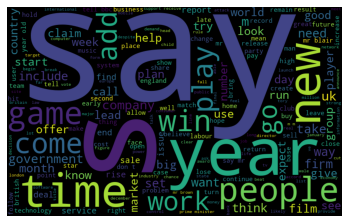

In [40]:
plt.imshow(wc)
plt.axis('off')
plt.show()

In [41]:
df.head()

,category,text,word_counts,char_counts,avg_word_len,stop_words_len,numerics_count
0,tech,tv future hand viewer home theatre system plas...,737,4333,4.786974,363,3
1,business,worldcom boss leave books worldcom boss bernie...,300,1842,5.036667,122,3
2,sport,tigers wary farrell gamble leicester rush make...,246,1342,4.361789,139,0
3,sport,yeade face newcastle fa cup premiership newcas...,341,2176,5.240469,82,0
4,entertainment,ocean s raids box office ocean s crime caper s...,260,1579,4.973077,93,1


In [42]:
dfr = df.copy()

In [43]:
dfr.head()

,category,text,word_counts,char_counts,avg_word_len,stop_words_len,numerics_count
0,tech,tv future hand viewer home theatre system plas...,737,4333,4.786974,363,3
1,business,worldcom boss leave books worldcom boss bernie...,300,1842,5.036667,122,3
2,sport,tigers wary farrell gamble leicester rush make...,246,1342,4.361789,139,0
3,sport,yeade face newcastle fa cup premiership newcas...,341,2176,5.240469,82,0
4,entertainment,ocean s raids box office ocean s crime caper s...,260,1579,4.973077,93,1


In [44]:
def convert_category_to_num(x):
    return cat_map[x]

In [108]:
dfr['category'] = dfr.category.apply(lambda x: convert_category_to_num(x))
y = dfr.iloc[:, 0:1]

KeyError: 4

In [46]:
x = dfr.iloc[:, 1:2]

In [47]:
dfr.head()

,category,text,word_counts,char_counts,avg_word_len,stop_words_len,numerics_count
0,4,tv future hand viewer home theatre system plas...,737,4333,4.786974,363,3
1,2,worldcom boss leave books worldcom boss bernie...,300,1842,5.036667,122,3
2,0,tigers wary farrell gamble leicester rush make...,246,1342,4.361789,139,0
3,0,yeade face newcastle fa cup premiership newcas...,341,2176,5.240469,82,0
4,1,ocean s raids box office ocean s crime caper s...,260,1579,4.973077,93,1


In [48]:
dfr.category.value_counts()

0    511
2    510
3    417
4    401
1    386
Name: category, dtype: int64

In [49]:
dfr_normalized0 = dfr[dfr['category'] == 0].sample(n=386, random_state=1)
dfr_normalized1 = dfr[dfr['category'] == 1].sample(n=386, random_state=1)
dfr_normalized2 = dfr[dfr['category'] == 2].sample(n=386, random_state=1)
dfr_normalized3 = dfr[dfr['category'] == 3].sample(n=386, random_state=1)
dfr_normalized4 = dfr[dfr['category'] == 4].sample(n=386, random_state=1)

In [50]:
dfr_normalized = pd.concat([dfr_normalized0, dfr_normalized1, dfr_normalized2, dfr_normalized3, dfr_normalized4])

In [51]:
dfr_normalized.category.value_counts()

4    386
3    386
2    386
1    386
0    386
Name: category, dtype: int64

In [52]:
dfr_normalized = dfr_normalized.sample(frac=1)

In [53]:
dfr_normalized.head()

,category,text,word_counts,char_counts,avg_word_len,stop_words_len,numerics_count
930,4,apple attack source row civil liberty group el...,325,2129,5.483077,134,2
1584,3,blair hail turkey - eu talk deal tony blair ha...,320,1851,4.712500,142,1
648,1,robots march cinema summit animate movie robot...,280,1580,4.560714,123,2
1870,0,jones doping probe begin investigation dope cl...,223,1325,4.869955,106,0
570,1,actor find gun residue actor robert blake guns...,258,1365,4.236434,122,2


In [54]:
X = dfr_normalized.iloc[:, 1:]
y = dfr_normalized.iloc[:, 0:1]

### Bag of Words(BoG)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
cv = CountVectorizer()
text_counts = cv.fit_transform(X['text'])

In [57]:
text_counts.toarray().shape

(1930, 24214)

In [58]:
dfr_bog = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

In [59]:
dfr_bog.head(2)

,00,000,0001,00051,000bn,000th,001,001and,001st,003,...,zonealarm,zones,zoom,zooropa,zornotza,zorro,zubair,zurich,zuton,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ML Algorithms

In [60]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [61]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgr_cv = LogisticRegressionCV(random_state=42, max_iter=1000, cv=2)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators = 200)

In [62]:
clf = {'SGD':sgd, 'LGR':lgr, 'LGR-CV':lgr_cv, 'SVM':svm, 'RFC':rfc}

In [63]:
def classify(X, y):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        cr = classification_report(y_test, y_pred)
        print(key, ' -------------> ', ac)
        print('classification_report -------------> ')
        print(cr)

In [64]:
%%time
classify(dfr_bog, y)

/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGD  ------------->  0.9792746113989638
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       0.97      0.97      0.97        77
           2       0.99      0.99      0.99        78
           3       0.96      0.96      0.96        77
           4       0.99      0.97      0.98        77

    accuracy                           0.98       386
   macro avg       0.98      0.98      0.98       386
weighted avg       0.98      0.98      0.98       386



/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGR  ------------->  0.966321243523316
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        77
           1       0.96      0.96      0.96        77
           2       0.99      0.95      0.97        78
           3       0.94      0.96      0.95        77
           4       0.99      0.96      0.97        77

    accuracy                           0.97       386
   macro avg       0.97      0.97      0.97       386
weighted avg       0.97      0.97      0.97       386



/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGR-CV  ------------->  0.9689119170984456
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        77
           1       0.96      0.97      0.97        77
           2       0.99      0.96      0.97        78
           3       0.95      0.95      0.95        77
           4       0.99      0.96      0.97        77

    accuracy                           0.97       386
   macro avg       0.97      0.97      0.97       386
weighted avg       0.97      0.97      0.97       386



/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-63-983ea12afc13>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf[key].fit(X_train, y_train)


SVM  ------------->  0.9792746113989638
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       0.97      0.97      0.97        77
           2       0.99      0.99      0.99        78
           3       0.96      0.96      0.96        77
           4       0.99      0.97      0.98        77

    accuracy                           0.98       386
   macro avg       0.98      0.98      0.98       386
weighted avg       0.98      0.98      0.98       386

RFC  ------------->  0.9740932642487047
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       0.96      0.97      0.97        77
           2       0.97      0.97      0.97        78
           3       0.96      0.96      0.96        77
           4       0.99      0.96      0.97        77

    accuracy                 

### TFIDF

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
tfidf = TfidfVectorizer()
dfr_idf = tfidf.fit_transform(X['text'])

In [67]:
dfr_idf

<1930x24214 sparse matrix of type '<class 'numpy.float64'>'
	with 267936 stored elements in Compressed Sparse Row format>

In [68]:
%%time
classify(pd.DataFrame(dfr_idf.toarray()), y)

/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGD  ------------->  0.9637305699481865
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        78
           1       0.99      0.92      0.95        77
           2       0.94      0.96      0.95        77
           3       0.95      0.99      0.97        77
           4       0.96      0.96      0.96        77

    accuracy                           0.96       386
   macro avg       0.96      0.96      0.96       386
weighted avg       0.96      0.96      0.96       386



/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGR  ------------->  0.9637305699481865
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        78
           1       0.99      0.92      0.95        77
           2       0.95      0.96      0.95        77
           3       0.95      0.99      0.97        77
           4       0.95      0.96      0.95        77

    accuracy                           0.96       386
   macro avg       0.96      0.96      0.96       386
weighted avg       0.96      0.96      0.96       386



/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGR-CV  ------------->  0.9637305699481865
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        78
           1       0.99      0.92      0.95        77
           2       0.95      0.96      0.95        77
           3       0.95      0.99      0.97        77
           4       0.95      0.96      0.95        77

    accuracy                           0.96       386
   macro avg       0.96      0.96      0.96       386
weighted avg       0.96      0.96      0.96       386



/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-63-983ea12afc13>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf[key].fit(X_train, y_train)


SVM  ------------->  0.961139896373057
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        78
           1       0.99      0.91      0.95        77
           2       0.91      0.97      0.94        77
           3       0.95      0.99      0.97        77
           4       0.97      0.95      0.96        77

    accuracy                           0.96       386
   macro avg       0.96      0.96      0.96       386
weighted avg       0.96      0.96      0.96       386

RFC  ------------->  0.9637305699481865
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        78
           1       0.96      0.94      0.95        77
           2       0.95      0.97      0.96        77
           3       0.96      0.99      0.97        77
           4       0.97      0.94      0.95        77

    accuracy                  

### Word2Vec

In [69]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [70]:
%%time
X['vector'] = X.text.apply(lambda x:get_vec(x))

CPU times: user 1min 20s, sys: 67.3 ms, total: 1min 20s
Wall time: 1min 20s


In [71]:
X.head()

,text,word_counts,char_counts,avg_word_len,stop_words_len,numerics_count,vector
930,apple attack source row civil liberty group el...,325,2129,5.483077,134,2,"[[1.0923009, 1.7935835, 0.63868225, -0.2128226..."
1584,blair hail turkey - eu talk deal tony blair ha...,320,1851,4.712500,142,1,"[[1.3325789, 1.8673353, 0.6538286, 0.17731293,..."
648,robots march cinema summit animate movie robot...,280,1580,4.560714,123,2,"[[1.1329535, 1.0920196, 0.36932322, -0.1456750..."
1870,jones doping probe begin investigation dope cl...,223,1325,4.869955,106,0,"[[1.2033923, 1.5701034, 0.68989784, -0.0474214..."
570,actor find gun residue actor robert blake guns...,258,1365,4.236434,122,2,"[[1.365878, 1.6602348, 0.5764746, 0.4420347, 1..."


In [72]:
dfr_word2vec = np.concatenate(X['vector'].to_numpy(), axis=0)

In [73]:
dfr_word2vec

array([[ 1.0923009 ,  1.7935835 ,  0.63868225, ...,  0.49315214,
         0.08087651,  0.5437524 ],
       [ 1.3325789 ,  1.8673353 ,  0.6538286 , ..., -0.03548217,
        -0.16664506,  0.49133378],
       [ 1.1329535 ,  1.0920196 ,  0.36932322, ...,  0.9301933 ,
         0.71437985, -0.5246903 ],
       ...,
       [ 1.2675698 ,  0.8523745 ,  0.21964112, ...,  0.5154252 ,
         0.3590316 , -0.08625705],
       [ 1.2116029 ,  1.5504915 ,  0.36803374, ...,  0.16061857,
         0.26497015,  0.5877901 ],
       [ 1.5544046 ,  1.9613017 ,  0.6630887 , ...,  0.07528539,
        -0.31403008,  0.52121484]], dtype=float32)

In [74]:
dfr_word2vec.shape

(1930, 96)

In [75]:
classify(pd.DataFrame(dfr_word2vec), y)

/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGD  ------------->  0.7046632124352331
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.91      0.66      0.77        77
           1       0.68      0.76      0.72        78
           2       0.61      0.66      0.64        77
           3       0.62      0.66      0.64        77
           4       0.77      0.78      0.77        77

    accuracy                           0.70       386
   macro avg       0.72      0.70      0.71       386
weighted avg       0.72      0.70      0.71       386

LGR  ------------->  0.7772020725388601
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        77
           1       0.72      0.81      0.76        78
           2       0.71      0.74      0.73        77
           3       0.80      0.69      0.74        77
           4       0.78      0.87      0.82        77

    accuracy                 

/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGR-CV  ------------->  0.8005181347150259
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.90      0.78      0.83        77
           1       0.79      0.83      0.81        78
           2       0.74      0.77      0.75        77
           3       0.78      0.75      0.77        77
           4       0.81      0.87      0.84        77

    accuracy                           0.80       386
   macro avg       0.80      0.80      0.80       386
weighted avg       0.80      0.80      0.80       386



/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/rakesh/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-63-983ea12afc13>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf[key].fit(X_train, y_train)


SVM  ------------->  0.7746113989637305
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        77
           1       0.74      0.77      0.75        78
           2       0.67      0.78      0.72        77
           3       0.76      0.71      0.74        77
           4       0.81      0.81      0.81        77

    accuracy                           0.77       386
   macro avg       0.78      0.77      0.78       386
weighted avg       0.78      0.77      0.78       386

RFC  ------------->  0.6865284974093264
classification_report -------------> 
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        77
           1       0.69      0.65      0.67        78
           2       0.62      0.68      0.65        77
           3       0.59      0.61      0.60        77
           4       0.72      0.75      0.73        77

    accuracy                 

### Glove Embedding

In [76]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Activation, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X.head()

,text,word_counts,char_counts,avg_word_len,stop_words_len,numerics_count,vector
930,apple attack source row civil liberty group el...,325,2129,5.483077,134,2,"[[1.0923009, 1.7935835, 0.63868225, -0.2128226..."
1584,blair hail turkey - eu talk deal tony blair ha...,320,1851,4.712500,142,1,"[[1.3325789, 1.8673353, 0.6538286, 0.17731293,..."
648,robots march cinema summit animate movie robot...,280,1580,4.560714,123,2,"[[1.1329535, 1.0920196, 0.36932322, -0.1456750..."
1870,jones doping probe begin investigation dope cl...,223,1325,4.869955,106,0,"[[1.2033923, 1.5701034, 0.68989784, -0.0474214..."
570,actor find gun residue actor robert blake guns...,258,1365,4.236434,122,2,"[[1.365878, 1.6602348, 0.5764746, 0.4420347, 1..."


In [79]:
text = X.text.to_list()
text[:3]

['apple attack source row civil liberty group electronic frontier foundation eff join legal fight online journalist apple apple want reporter reveal 20 source story leak information forthcoming product include mac mini eff represent reporter ask california s superior court stop apple pursue source argue journalist protect american constitution eff say case threaten basic freedom press apple particularly keen find source information unrelease product code - name asteroid ask journalist e - mail provider hand communication relevant confronting issue reporter s privilege head - on apple go journalist s isps e - mails say eff lawyer kurt opsahl undermines fundamental amendment right protect reporter court let apple away expose confidence gain reporter potential confidential source deter provide information medium public lose vital outlet independent news analysis commentary say case begin december 2004 apple ask local californian court journalist reveal source article publish website apple

In [80]:
token = Tokenizer()
token.fit_on_texts(text)

In [81]:
vocal_size = len(token.word_index) + 1
vocal_size

24248

In [82]:
#print(token.index_word)

In [83]:
encoded_text = token.texts_to_sequences(text)

In [84]:
print(encoded_text[:3])

[[406, 177, 718, 859, 795, 1921, 66, 681, 5957, 1771, 4282, 421, 272, 411, 191, 1092, 406, 406, 26, 1211, 580, 260, 718, 548, 2481, 173, 2364, 371, 30, 983, 810, 4282, 776, 1211, 187, 1472, 1, 3862, 164, 351, 406, 2092, 718, 457, 1092, 621, 395, 1772, 4282, 2, 185, 1349, 1350, 1489, 581, 406, 733, 954, 60, 718, 173, 8181, 371, 768, 416, 8182, 187, 1092, 266, 279, 1456, 352, 1490, 3403, 11473, 95, 1211, 1, 4536, 286, 1061, 406, 19, 1092, 1, 11474, 266, 2553, 2, 4282, 846, 5139, 8183, 11475, 2195, 4046, 71, 621, 1211, 164, 257, 406, 269, 2554, 928, 719, 1211, 634, 2196, 718, 5140, 253, 173, 258, 80, 144, 1304, 6514, 682, 102, 2365, 5141, 2, 185, 280, 315, 75, 406, 187, 295, 6515, 164, 1092, 580, 718, 1737, 669, 171, 11476, 11477, 406, 244, 11478, 173, 11479, 233, 31, 1456, 9521, 1, 2555, 1509, 1922, 5142, 47, 234, 2197, 1011, 173, 669, 185, 2093, 191, 1092, 4536, 860, 292, 617, 826, 4282, 719, 1238, 1923, 272, 538, 406, 30, 2007, 1667, 11480, 1970, 8184, 284, 610, 1472, 2637, 9522, 106, 

In [85]:
max_length = 120
x = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [86]:
print(x.shape)

(1930, 120)


### GloVe Vectors

In [87]:
glove_vectors = dict()

In [88]:
%%time
file = open('glove.6B.200d.txt', encoding='utf-8')

for line in file:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:])
    glove_vectors[word] = vectors
file.close()

CPU times: user 18.3 s, sys: 1.83 s, total: 20.1 s
Wall time: 22.7 s


In [89]:
#Notebook might get crashed
#glove_vectors.keys()

In [90]:
len(glove_vectors.keys())

400000

In [91]:
glove_vectors.get('random')

array(['0.37813', '0.92614', '0.3727', '-0.61136', '0.24027', '0.24614',
       '-0.47114', '0.31374', '-0.23494', '0.066188', '-0.10026',
       '-0.033629', '0.051124', '0.80388', '-0.1391', '-0.54256',
       '-0.3382', '-0.078113', '-0.53442', '0.21457', '-0.19126',
       '1.2424', '0.078059', '-0.17928', '0.13324', '-0.58206',
       '-0.091322', '-0.97505', '0.035215', '0.57298', '-0.39221',
       '0.68945', '0.88888', '-0.53203', '0.68791', '-0.033063',
       '0.31708', '0.39264', '0.85859', '0.50527', '0.81737', '-0.34808',
       '0.34407', '1.1068', '0.030525', '0.62431', '0.9466', '-0.75378',
       '-0.22516', '-0.20841', '-0.49595', '0.036783', '-0.61816',
       '0.41319', '0.51789', '0.033641', '-0.23864', '0.49061',
       '0.059886', '-0.22026', '-0.5305', '0.39574', '-0.11212',
       '-0.81318', '-0.031324', '-0.41972', '-0.22557', '0.64584',
       '-0.53768', '0.82092', '-0.20618', '0.47787', '0.032152',
       '0.85575', '-0.018312', '0.22849', '0.1662', '-0.81

In [92]:
word_vector_matrix = np.zeros((vocal_size, 200))

In [93]:
word_vector_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
for word, index in token.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
        word_vector_matrix[index] = vector
    else:
        print(word)

ebber
35bn
jeeve
mcletchie
phishe
cabir
hivaid
exeem
11bn
27bn
13bn
15bn
hamstre
blogline
eastender
4bn
6bn
blogge
16bn
18bn
telew
ripguard
12bn
20bn
latinohiphopradiocom
14bn
25bn
sloncek
schole
dialler
morquendi
groundbreake
5bn
itune
mccririck
eduvision
phytopharm
odpm
trialle
suprnova
mercede
purushotma
stanste
bofra
8bn
hadn
17bn
94bn
celltick
gameboyzz
buhecha
23bn
29bn
icstis
suprnovaorg
wippit
amazoncom
45bn
pende
275bn
hughe
300p
verita
sonaptic
nogar
60bn
aragone
supercompute
26bn
makower
optinrealbig
200lr
clearswift
3ami
pouwelse
30bn
broadreach
intoppa
tods
thoday
zafi
180bn
apacs
reoffende
bruvik
holiff
93bn
contrack
diemont
000th
48bn
145bn
75bn
70p
easymobile
outdate
ofste
22bn
capabilitie
prettejohn
smernicki
55bn
31bn
nachison
cellery
brizzel
toshitsune
saldarriaga
kujda
280bn
emiew
futurelab
unrelease
197bn
100bn
nielsennetrating
7610
serialise
stre
vetham
injurie
krivorizhstal
speakerboxxxthe
caf233
petere
errigo
whingee
54bn
nielsennetratings
uncap
leoncia
shadowcr

unwavere
euskarians
wwwarsenalcom
5567
upswe
wojahn
quirksville
unforgive
enfance
estae
aymone
driv3r
scabber
annualise
dishevel
granclaude
01115
rapsung
cosiness
romitaand
548p
365bn
3997
coachload
smses
ramdhan
2001fetched
halobungieorg
titbit
vegetating
euro1080
aara
mattresse
95bn
394bn
1177bn
strihavka
governmenthas
amputator
softwareof
5037
jasperneite
2935p
syndol
meltus
tateson
17255
3939
clich233d
unshredded
securewave
convolute
warcup
gybels
afteward
am3d
confesse
filmmake
angadias
088
evalution
methat
269bn
268bn
thinkvantage
hpcompaq
protecttool
drkw
rebidde
102bn
21718
cddvd
idolise
mafeca
varttina
areconsulte
priet
20012
messagelab
scattergun
crisisonly
by3
angolanfrenchportuguese
325bn
songwriterguitarist
sideburn
2852
resonsible
buttnumbathon
us100
legisation
politcian
brownbeck
diamound
emenate
surprisngly
revolutionalise
anyhte
questionsmarks
folllowe
201bn
2146bn1145bn
4795bn
12011
6962
testimonie
mistresse
diarie
thanksgive
fawke
gorebridge
stagework
sseyo
minimixa


### TF2.0 and Keras Model Building

In [95]:
x

array([[ 1211,     1,  4536, ...,  1530,   433,   412],
       [ 3029,   296,    95, ..., 11484,  2483, 11485],
       [    6,  2484,  5143, ...,  3141,     7,   234],
       ...,
       [ 5522,  4785,  3469, ...,     0,     0,     0],
       [   14,   376,  3536, ...,   198,   764,   433],
       [    4,  3983,     2, ...,    28,   273,    59]], dtype=int32)

In [121]:
x.shape

(1930, 120)

In [98]:
y.shape

(1930, 1)

In [117]:
y = np.array(y).reshape(-1, 1)
y = y.flatten()

In [118]:
y.shape

(1930,)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42, stratify = y, test_size = 0.2)

In [134]:
vec_size = 200
model = Sequential()
model.add(Embedding(vocal_size, vec_size, input_length=max_length, weights=[word_vector_matrix], trainable=False))

model.add(Conv1D(64, 8, activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation = 'relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentrioy', metrics = ['accuracy'])

model.fit(X_train, X_test, epochs = 30, validation_data = (X_test, y_test))

ValueError: Data cardinality is ambiguous:
  x sizes: 1544
  y sizes: 386
Please provide data which shares the same first dimension.

In [130]:
pd.DataFrame(y.reshape(-1, 1))[0].value_counts()

4    386
3    386
2    386
1    386
0    386
Name: 0, dtype: int64

4.0